RBF + WhiteKernel Kernel:
0.909**2 * RBF(length_scale=1.75) + WhiteKernel(noise_level=0.00674)
--------------------------------------------------
Matern (ν=3/2) + WhiteKernel Kernel:
0.79**2 * Matern(length_scale=2.53, nu=1.5) + WhiteKernel(noise_level=0.00673)
--------------------------------------------------
Matern (ν=5/2) + WhiteKernel Kernel:
0.944**2 * Matern(length_scale=2.42, nu=2.5) + WhiteKernel(noise_level=0.00696)
--------------------------------------------------
Rational Quadratic + WhiteKernel Kernel:
0.909**2 * RationalQuadratic(alpha=8.49e+05, length_scale=1.75) + WhiteKernel(noise_level=0.00674)
--------------------------------------------------
Periodic + WhiteKernel Kernel:
3.02**2 * ExpSineSquared(length_scale=6.15, periodicity=6.24) + WhiteKernel(noise_level=0.00627)
--------------------------------------------------


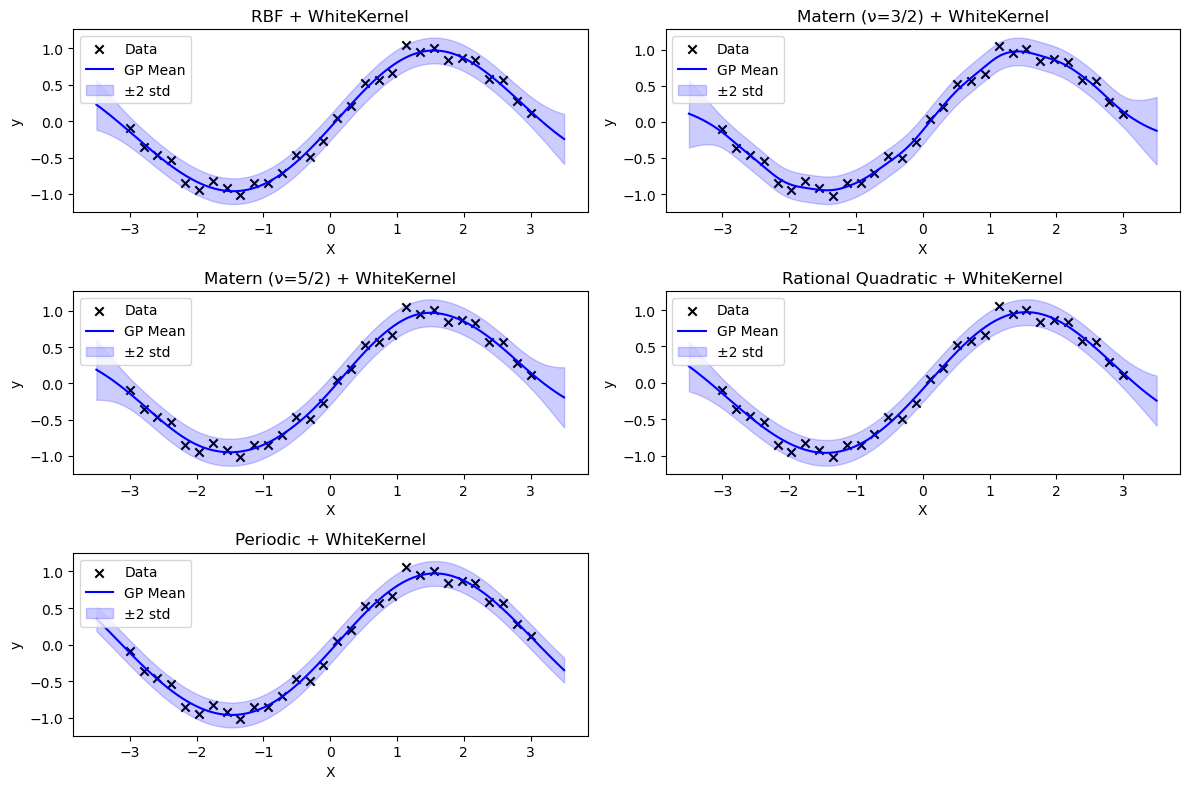

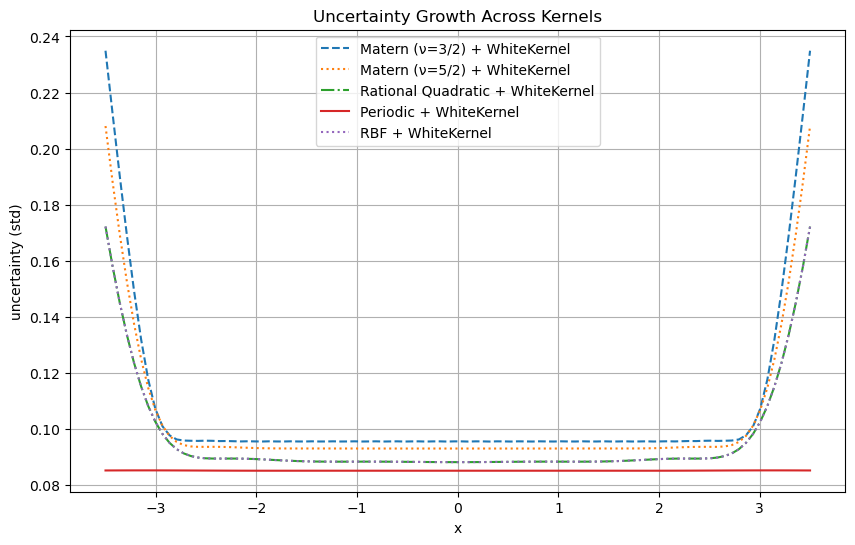

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, RationalQuadratic, ExpSineSquared

# Set seed for reproducibility
np.random.seed(42)

# Generate 30 training data points
X = np.linspace(-3, 3, 30).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Generate test points
X_test = np.linspace(-3.5, 3.5, 100).reshape(-1, 1)

# Define different kernels
kernels = {
    "RBF + WhiteKernel": 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-6, 1e-1)),
    "Matern (ν=3/2) + WhiteKernel": 1.0 * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-6, 1e-1)),
    "Matern (ν=5/2) + WhiteKernel": 1.0 * Matern(length_scale=1.0, nu=2.5) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-6, 1e-1)),
    "Rational Quadratic + WhiteKernel": 1.0 * RationalQuadratic(alpha=1.0, length_scale=1.0, alpha_bounds=(1e-2, 1e6)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-6, 1)),
    "Periodic + WhiteKernel": 1.0 * ExpSineSquared(length_scale=1.0, length_scale_bounds=(1e-2, 10.0), periodicity=2.0 * np.pi) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-6, 1))
}


# Store uncertainty predictions
uncertainty_results = {}

# Generate subplots
plt.figure(figsize=(12, 8))

for i, (name, kernel) in enumerate(kernels.items(), 1):
    # Fit GPR model
    gp_model = GaussianProcessRegressor(kernel=kernel)
    gp_model.fit(X, y)
    
    # Make predictions
    y_pred, y_std = gp_model.predict(X_test, return_std=True)

    # Store standard deviation
    uncertainty_results[name] = y_std  
    
    # Plot
    plt.subplot(3, 2, i)
    plt.scatter(X, y, color='black', label="Data", marker='x')
    plt.plot(X_test, y_pred, label="GP Mean", color='blue')
    plt.fill_between(X_test.ravel(), y_pred - 2*y_std, y_pred + 2*y_std, color="blue", alpha=0.2, label="±2 std")
    plt.title(name)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    
    # Print learned kernel parameters
    print(f"{name} Kernel:")
    print(gp_model.kernel_)
    print("-" * 50)

plt.tight_layout()
plt.show()

# Plot uncertainty growth across kernels
plt.figure(figsize=(10, 6))

# Ensure RBF is plotted last to make it more visible
sorted_kernels = ["Matern (ν=3/2) + WhiteKernel", "Matern (ν=5/2) + WhiteKernel", 
                  "Rational Quadratic + WhiteKernel", "Periodic + WhiteKernel", "RBF + WhiteKernel"]

line_styles = {
    "RBF + WhiteKernel": "dotted",
    "Matern (ν=3/2) + WhiteKernel": "dashed",
    "Matern (ν=5/2) + WhiteKernel": "dotted",
    "Rational Quadratic + WhiteKernel": "dashdot",
    "Periodic + WhiteKernel": "solid"
}

for name in sorted_kernels:  # Ensure RBF is plotted last
    y_std = uncertainty_results[name]
    plt.plot(X_test, y_std, label=name, linestyle=line_styles[name])

plt.xlabel("x")
plt.ylabel("uncertainty (std)")
plt.title("Uncertainty Growth Across Kernels")
plt.legend()
plt.grid(True)
plt.show()